In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, sys
from tqdm import tqdm
from datetime import datetime

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable

from sklearn.decomposition import PCA


from autoencoder import Autoencoder
from solver import train_vali_all_epochs, dev_train_vali_all_epochs, test

In [2]:
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

batch_size = 128
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=6)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=6)

In [3]:
run_id = datetime.today().strftime("%Y-%m-%d_%H-%M-%S")
save_path = os.getenv("HOME") + '/sparsify_models/AE/MNIST/' +run_id +'/'
print(save_path)

/home/david/sparsify_models/AE/MNIST/2024-10-10_15-11-45/


In [5]:
learning_rates = [0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001]

all_train_losses = []
all_vali_losses = []

for lr in learning_rates:
    model = Autoencoder(n_input=784, n_hidden_ls=[512, 256, 32], n_layers=3)
    optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9)
    train_losses, vali_losses = train_vali_all_epochs(model, train_loader, test_loader, optimizer, n_epochs=5, device=torch.device('cuda'), save_path=save_path+'Static/')
    all_train_losses.append(train_losses)
    all_vali_losses.append(vali_losses)

Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000272: 100%|██████████| 469/469 [00:01<00:00, 262.59it/s]


====> Epoch: 0 Average loss: 0.0403
====> Test set loss: 0.0255
Weights saved.


Train Epoch: 1 [44928/60000 (100%)]	Loss: 0.000214: 100%|██████████| 469/469 [00:01<00:00, 273.67it/s]


====> Epoch: 1 Average loss: 0.0225
====> Test set loss: 0.0197
Weights saved.


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000188: 100%|██████████| 469/469 [00:01<00:00, 261.58it/s]

====> Epoch: 2 Average loss: 0.0191


====> Test set loss: 0.0177
Weights saved.


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000191: 100%|██████████| 469/469 [00:01<00:00, 270.17it/s]


====> Epoch: 3 Average loss: 0.0177
====> Test set loss: 0.0171
Weights saved.


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000182: 100%|██████████| 469/469 [00:01<00:00, 269.30it/s]


====> Epoch: 4 Average loss: 0.0175
====> Test set loss: 0.0169
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000361: 100%|██████████| 469/469 [00:01<00:00, 257.50it/s]

====> Epoch: 0 Average loss: 0.0522


====> Test set loss: 0.0355
Weights saved.


Train Epoch: 1 [44928/60000 (100%)]	Loss: 0.000274: 100%|██████████| 469/469 [00:01<00:00, 248.42it/s]

====> Epoch: 1 Average loss: 0.0311


====> Test set loss: 0.0268
Weights saved.


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000250: 100%|██████████| 469/469 [00:01<00:00, 250.57it/s]


====> Epoch: 2 Average loss: 0.0252
====> Test set loss: 0.0231
Weights saved.


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000230: 100%|██████████| 469/469 [00:01<00:00, 252.49it/s]


====> Epoch: 3 Average loss: 0.0223
====> Test set loss: 0.0207
Weights saved.


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000212: 100%|██████████| 469/469 [00:01<00:00, 250.13it/s]


====> Epoch: 4 Average loss: 0.0204
====> Test set loss: 0.0192
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000485: 100%|██████████| 469/469 [00:01<00:00, 254.88it/s]


====> Epoch: 0 Average loss: 0.0616
====> Test set loss: 0.0460
Weights saved.


Train Epoch: 1 [44928/60000 (100%)]	Loss: 0.000353: 100%|██████████| 469/469 [00:01<00:00, 248.89it/s]


====> Epoch: 1 Average loss: 0.0402
====> Test set loss: 0.0355
Weights saved.


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000317: 100%|██████████| 469/469 [00:01<00:00, 244.10it/s]

====> Epoch: 2 Average loss: 0.0331


====> Test set loss: 0.0303
Weights saved.


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000283: 100%|██████████| 469/469 [00:01<00:00, 250.88it/s]

====> Epoch: 3 Average loss: 0.0291


====> Test set loss: 0.0272
Weights saved.


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000260: 100%|██████████| 469/469 [00:01<00:00, 245.59it/s]

====> Epoch: 4 Average loss: 0.0266


====> Test set loss: 0.0251
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000577: 100%|██████████| 469/469 [00:01<00:00, 245.41it/s]

====> Epoch: 0 Average loss: 0.0689


====> Test set loss: 0.0592
Weights saved.


Train Epoch: 1 [44928/60000 (100%)]	Loss: 0.000482: 100%|██████████| 469/469 [00:01<00:00, 239.15it/s]

====> Epoch: 1 Average loss: 0.0526


====> Test set loss: 0.0461
Weights saved.


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000390: 100%|██████████| 469/469 [00:01<00:00, 238.78it/s]


====> Epoch: 2 Average loss: 0.0425
====> Test set loss: 0.0390
Weights saved.


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000377: 100%|██████████| 469/469 [00:01<00:00, 247.28it/s]

====> Epoch: 3 Average loss: 0.0373


====> Test set loss: 0.0352
Weights saved.


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000371: 100%|██████████| 469/469 [00:01<00:00, 250.21it/s]

====> Epoch: 4 Average loss: 0.0345


====> Test set loss: 0.0329
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000648: 100%|██████████| 469/469 [00:01<00:00, 246.46it/s]

====> Epoch: 0 Average loss: 0.0756


====> Test set loss: 0.0636
Weights saved.


Train Epoch: 1 [44928/60000 (100%)]	Loss: 0.000647: 100%|██████████| 469/469 [00:01<00:00, 249.69it/s]

====> Epoch: 1 Average loss: 0.0627


====> Test set loss: 0.0616
Weights saved.


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000578: 100%|██████████| 469/469 [00:01<00:00, 246.22it/s]


====> Epoch: 2 Average loss: 0.0595
====> Test set loss: 0.0564
Weights saved.


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000505: 100%|██████████| 469/469 [00:01<00:00, 245.53it/s]


====> Epoch: 3 Average loss: 0.0533
====> Test set loss: 0.0498
Weights saved.


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000486: 100%|██████████| 469/469 [00:01<00:00, 247.92it/s]


====> Epoch: 4 Average loss: 0.0476
====> Test set loss: 0.0448
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000654: 100%|██████████| 469/469 [00:01<00:00, 252.25it/s]

====> Epoch: 0 Average loss: 0.0838


====> Test set loss: 0.0643
Weights saved.


Train Epoch: 1 [44928/60000 (100%)]	Loss: 0.000679: 100%|██████████| 469/469 [00:01<00:00, 238.98it/s]


====> Epoch: 1 Average loss: 0.0637
====> Test set loss: 0.0634
Weights saved.


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000657: 100%|██████████| 469/469 [00:01<00:00, 247.05it/s]


====> Epoch: 2 Average loss: 0.0630
====> Test set loss: 0.0627
Weights saved.


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000599: 100%|██████████| 469/469 [00:01<00:00, 246.16it/s]

====> Epoch: 3 Average loss: 0.0622


====> Test set loss: 0.0616
Weights saved.


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000610: 100%|██████████| 469/469 [00:01<00:00, 240.95it/s]

====> Epoch: 4 Average loss: 0.0607


====> Test set loss: 0.0595
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000862: 100%|██████████| 469/469 [00:01<00:00, 242.60it/s]

====> Epoch: 0 Average loss: 0.1002


====> Test set loss: 0.0829
Weights saved.


Train Epoch: 1 [44928/60000 (100%)]	Loss: 0.000679: 100%|██████████| 469/469 [00:01<00:00, 241.01it/s]


====> Epoch: 1 Average loss: 0.0689
====> Test set loss: 0.0644
Weights saved.


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000669: 100%|██████████| 469/469 [00:02<00:00, 218.14it/s]


====> Epoch: 2 Average loss: 0.0640
====> Test set loss: 0.0638
Weights saved.


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000689: 100%|██████████| 469/469 [00:02<00:00, 206.91it/s]

====> Epoch: 3 Average loss: 0.0635


====> Test set loss: 0.0634
Weights saved.


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000659: 100%|██████████| 469/469 [00:02<00:00, 231.91it/s]

====> Epoch: 4 Average loss: 0.0631


====> Test set loss: 0.0629
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000998: 100%|██████████| 469/469 [00:02<00:00, 229.93it/s]

====> Epoch: 0 Average loss: 0.1088


====> Test set loss: 0.1058
Weights saved.


Train Epoch: 1 [44928/60000 (100%)]	Loss: 0.000933: 100%|██████████| 469/469 [00:02<00:00, 234.49it/s]

====> Epoch: 1 Average loss: 0.0984


====> Test set loss: 0.0944
Weights saved.


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000814: 100%|██████████| 469/469 [00:02<00:00, 230.20it/s]

====> Epoch: 2 Average loss: 0.0855


====> Test set loss: 0.0788
Weights saved.


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000692: 100%|██████████| 469/469 [00:02<00:00, 201.48it/s]


====> Epoch: 3 Average loss: 0.0717
====> Test set loss: 0.0678
Weights saved.


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000683: 100%|██████████| 469/469 [00:01<00:00, 237.62it/s]


====> Epoch: 4 Average loss: 0.0659
====> Test set loss: 0.0650
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.001135: 100%|██████████| 469/469 [00:02<00:00, 229.11it/s]

====> Epoch: 0 Average loss: 0.1119


====> Test set loss: 0.1115
Weights saved.


Train Epoch: 1 [44928/60000 (100%)]	Loss: 0.001021: 100%|██████████| 469/469 [00:01<00:00, 241.47it/s]

====> Epoch: 1 Average loss: 0.1069


====> Test set loss: 0.1066
Weights saved.


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.001055: 100%|██████████| 469/469 [00:01<00:00, 241.97it/s]


====> Epoch: 2 Average loss: 0.1022
====> Test set loss: 0.1016
Weights saved.


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000985: 100%|██████████| 469/469 [00:01<00:00, 236.33it/s]

====> Epoch: 3 Average loss: 0.0971


====> Test set loss: 0.0959
Weights saved.


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000914: 100%|██████████| 469/469 [00:01<00:00, 244.24it/s]

====> Epoch: 4 Average loss: 0.0910


====> Test set loss: 0.0889
Weights saved.
All train losses saved.


Text(0.5, 1.0, 'Loss AE')

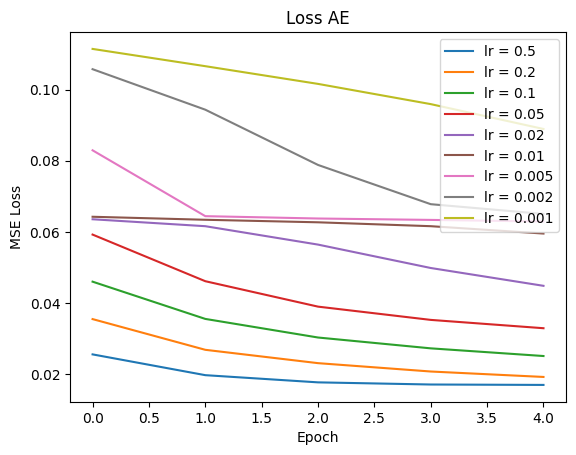

In [6]:
plt.figure()
for i in range(9):
    plt.plot(all_vali_losses[i], label='lr = ' + str(learning_rates[i]))
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss AE')

In [7]:
momentums = [0.99, 0.95, 0.9, 0.8, 0.7, 0.5]

all_train_losses = []
all_vali_losses = []

for momentum in momentums:
    model = Autoencoder(n_input=784, n_hidden_ls=[512, 256, 32], n_layers=3)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.5, momentum=momentum)
    train_losses, vali_losses = train_vali_all_epochs(model, train_loader, test_loader, optimizer, n_epochs=5, device=torch.device('cuda'), save_path=save_path+'Static/')
    all_train_losses.append(train_losses)
    all_vali_losses.append(vali_losses)

Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000201: 100%|██████████| 469/469 [00:01<00:00, 255.99it/s]

====> Epoch: 0 Average loss: 0.0346


====> Test set loss: 0.0189
Weights saved.


Train Epoch: 1 [44928/60000 (100%)]	Loss: 0.000184: 100%|██████████| 469/469 [00:01<00:00, 243.01it/s]

====> Epoch: 1 Average loss: 0.0180


====> Test set loss: 0.0170
Weights saved.


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000193: 100%|██████████| 469/469 [00:02<00:00, 231.48it/s]


====> Epoch: 2 Average loss: 0.0174
====> Test set loss: 0.0169
Weights saved.


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000188: 100%|██████████| 469/469 [00:01<00:00, 237.64it/s]

====> Epoch: 3 Average loss: 0.0173


====> Test set loss: 0.0169
Weights saved.


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000182: 100%|██████████| 469/469 [00:01<00:00, 252.92it/s]


====> Epoch: 4 Average loss: 0.0173
====> Test set loss: 0.0169
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000216: 100%|██████████| 469/469 [00:01<00:00, 247.16it/s]


====> Epoch: 0 Average loss: 0.0356
====> Test set loss: 0.0208
Weights saved.


Train Epoch: 1 [44928/60000 (100%)]	Loss: 0.000177: 100%|██████████| 469/469 [00:01<00:00, 243.65it/s]


====> Epoch: 1 Average loss: 0.0189
====> Test set loss: 0.0172
Weights saved.


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000174: 100%|██████████| 469/469 [00:02<00:00, 233.21it/s]


====> Epoch: 2 Average loss: 0.0175
====> Test set loss: 0.0170
Weights saved.


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000177: 100%|██████████| 469/469 [00:02<00:00, 230.65it/s]

====> Epoch: 3 Average loss: 0.0174


====> Test set loss: 0.0169
Weights saved.


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000180: 100%|██████████| 469/469 [00:02<00:00, 233.26it/s]


====> Epoch: 4 Average loss: 0.0174
====> Test set loss: 0.0169
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000260: 100%|██████████| 469/469 [00:02<00:00, 234.13it/s]

====> Epoch: 0 Average loss: 0.0404


====> Test set loss: 0.0253
Weights saved.


Train Epoch: 1 [44928/60000 (100%)]	Loss: 0.000201: 100%|██████████| 469/469 [00:01<00:00, 248.67it/s]

====> Epoch: 1 Average loss: 0.0221


====> Test set loss: 0.0193
Weights saved.


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000179: 100%|██████████| 469/469 [00:01<00:00, 242.80it/s]

====> Epoch: 2 Average loss: 0.0189


====> Test set loss: 0.0178
Weights saved.


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000185: 100%|██████████| 469/469 [00:01<00:00, 252.60it/s]


====> Epoch: 3 Average loss: 0.0178
====> Test set loss: 0.0171
Weights saved.


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000180: 100%|██████████| 469/469 [00:01<00:00, 247.36it/s]


====> Epoch: 4 Average loss: 0.0175
====> Test set loss: 0.0170
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000351: 100%|██████████| 469/469 [00:01<00:00, 255.42it/s]

====> Epoch: 0 Average loss: 0.0474


====> Test set loss: 0.0318
Weights saved.


Train Epoch: 1 [44928/60000 (100%)]	Loss: 0.000251: 100%|██████████| 469/469 [00:01<00:00, 237.93it/s]


====> Epoch: 1 Average loss: 0.0284
====> Test set loss: 0.0250
Weights saved.


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000239: 100%|██████████| 469/469 [00:01<00:00, 255.76it/s]

====> Epoch: 2 Average loss: 0.0236


====> Test set loss: 0.0216
Weights saved.


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000211: 100%|██████████| 469/469 [00:01<00:00, 251.30it/s]


====> Epoch: 3 Average loss: 0.0209
====> Test set loss: 0.0194
Weights saved.


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000205: 100%|██████████| 469/469 [00:01<00:00, 249.05it/s]

====> Epoch: 4 Average loss: 0.0192


====> Test set loss: 0.0181
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000423: 100%|██████████| 469/469 [00:01<00:00, 243.35it/s]


====> Epoch: 0 Average loss: 0.0527
====> Test set loss: 0.0376
Weights saved.


Train Epoch: 1 [44928/60000 (100%)]	Loss: 0.000290: 100%|██████████| 469/469 [00:01<00:00, 253.26it/s]


====> Epoch: 1 Average loss: 0.0333
====> Test set loss: 0.0293
Weights saved.


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000258: 100%|██████████| 469/469 [00:01<00:00, 246.81it/s]


====> Epoch: 2 Average loss: 0.0271
====> Test set loss: 0.0243
Weights saved.


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000237: 100%|██████████| 469/469 [00:01<00:00, 250.91it/s]


====> Epoch: 3 Average loss: 0.0236
====> Test set loss: 0.0221
Weights saved.


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000221: 100%|██████████| 469/469 [00:02<00:00, 221.16it/s]

====> Epoch: 4 Average loss: 0.0219


====> Test set loss: 0.0207
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000489: 100%|██████████| 469/469 [00:01<00:00, 249.83it/s]

====> Epoch: 0 Average loss: 0.0597


====> Test set loss: 0.0454
Weights saved.


Train Epoch: 1 [44928/60000 (100%)]	Loss: 0.000358: 100%|██████████| 469/469 [00:01<00:00, 251.55it/s]

====> Epoch: 1 Average loss: 0.0398


====> Test set loss: 0.0344
Weights saved.


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000312: 100%|██████████| 469/469 [00:01<00:00, 275.49it/s]

====> Epoch: 2 Average loss: 0.0320


====> Test set loss: 0.0294
Weights saved.


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000285: 100%|██████████| 469/469 [00:01<00:00, 261.15it/s]

====> Epoch: 3 Average loss: 0.0284


====> Test set loss: 0.0266
Weights saved.


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000269: 100%|██████████| 469/469 [00:01<00:00, 262.60it/s]


====> Epoch: 4 Average loss: 0.0260
====> Test set loss: 0.0245
Weights saved.
All train losses saved.


Text(0.5, 1.0, 'Loss AE')

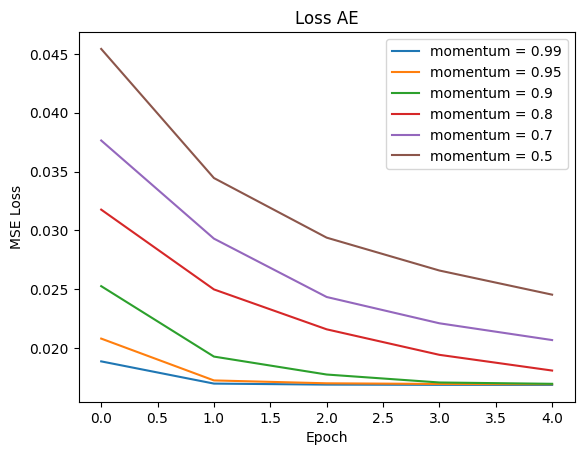

In [8]:
plt.figure()
for i in range(len(momentums)):
    plt.plot(all_vali_losses[i], label='momentum = ' + str(momentums[i]))
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss AE')

In [10]:
all_n_hidden_layers = [[512, 256, 32], [512, 128, 32], [256, 128, 32], [256, 64, 32]]

all_train_losses = []
all_vali_losses = []

for i in range(len(all_n_hidden_layers)):
    model = Autoencoder(n_input=784, n_hidden_ls=all_n_hidden_layers[i], n_layers=len(all_n_hidden_layers[i]))
    optimizer = torch.optim.SGD(model.parameters(), lr=0.5, momentum=0.99)
    train_losses, vali_losses = train_vali_all_epochs(model, train_loader, test_loader, optimizer, n_epochs=9, device=torch.device('cuda'), save_path=save_path+'Static/')
    all_train_losses.append(train_losses)
    all_vali_losses.append(vali_losses)

Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000192: 100%|██████████| 469/469 [00:01<00:00, 260.87it/s]

====> Epoch: 0 Average loss: 0.0341



/home/david/Documents/UNI_LOCAL/PyTorch/MarkosCode/solver.py:308: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0187
Weights saved.


Train Epoch: 1 [44928/60000 (100%)]	Loss: 0.000172: 100%|██████████| 469/469 [00:01<00:00, 253.65it/s]


====> Epoch: 1 Average loss: 0.0179
====> Test set loss: 0.0170
Weights saved.


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000181: 100%|██████████| 469/469 [00:01<00:00, 254.74it/s]


====> Epoch: 2 Average loss: 0.0174
====> Test set loss: 0.0169
Weights saved.


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000187: 100%|██████████| 469/469 [00:01<00:00, 259.24it/s]


====> Epoch: 3 Average loss: 0.0173
====> Test set loss: 0.0169
Weights saved.


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000176: 100%|██████████| 469/469 [00:01<00:00, 254.61it/s]

====> Epoch: 4 Average loss: 0.0173


====> Test set loss: 0.0169
Weights saved.


Train Epoch: 5 [44928/60000 (100%)]	Loss: 0.000184: 100%|██████████| 469/469 [00:01<00:00, 266.93it/s]

====> Epoch: 5 Average loss: 0.0173


====> Test set loss: 0.0169
Weights saved.


Train Epoch: 6 [44928/60000 (100%)]	Loss: 0.000184: 100%|██████████| 469/469 [00:01<00:00, 245.98it/s]


====> Epoch: 6 Average loss: 0.0173
====> Test set loss: 0.0169
Weights saved.


Train Epoch: 7 [44928/60000 (100%)]	Loss: 0.000173: 100%|██████████| 469/469 [00:01<00:00, 261.76it/s]


====> Epoch: 7 Average loss: 0.0173
====> Test set loss: 0.0169
Weights saved.


Train Epoch: 8 [44928/60000 (100%)]	Loss: 0.000180: 100%|██████████| 469/469 [00:01<00:00, 255.33it/s]


====> Epoch: 8 Average loss: 0.0173
====> Test set loss: 0.0169
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000219: 100%|██████████| 469/469 [00:01<00:00, 254.27it/s]


====> Epoch: 0 Average loss: 0.0357
====> Test set loss: 0.0200
Weights saved.


Train Epoch: 1 [44928/60000 (100%)]	Loss: 0.000161: 100%|██████████| 469/469 [00:01<00:00, 256.71it/s]

====> Epoch: 1 Average loss: 0.0186


====> Test set loss: 0.0172
Weights saved.


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000185: 100%|██████████| 469/469 [00:01<00:00, 261.01it/s]

====> Epoch: 2 Average loss: 0.0175


====> Test set loss: 0.0169
Weights saved.


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000186: 100%|██████████| 469/469 [00:01<00:00, 270.67it/s]

====> Epoch: 3 Average loss: 0.0174


====> Test set loss: 0.0169
Weights saved.


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000182: 100%|██████████| 469/469 [00:01<00:00, 271.41it/s]


====> Epoch: 4 Average loss: 0.0173
====> Test set loss: 0.0169
Weights saved.


Train Epoch: 5 [44928/60000 (100%)]	Loss: 0.000190: 100%|██████████| 469/469 [00:01<00:00, 288.01it/s]

====> Epoch: 5 Average loss: 0.0173


====> Test set loss: 0.0169
Weights saved.


Train Epoch: 6 [44928/60000 (100%)]	Loss: 0.000180: 100%|██████████| 469/469 [00:01<00:00, 297.21it/s]

====> Epoch: 6 Average loss: 0.0173


====> Test set loss: 0.0169
Weights saved.


Train Epoch: 7 [44928/60000 (100%)]	Loss: 0.000174: 100%|██████████| 469/469 [00:01<00:00, 260.18it/s]

====> Epoch: 7 Average loss: 0.0173


====> Test set loss: 0.0169
Weights saved.


Train Epoch: 8 [44928/60000 (100%)]	Loss: 0.000173: 100%|██████████| 469/469 [00:01<00:00, 249.76it/s]


====> Epoch: 8 Average loss: 0.0173
====> Test set loss: 0.0169
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000207: 100%|██████████| 469/469 [00:01<00:00, 247.65it/s]


====> Epoch: 0 Average loss: 0.0366
====> Test set loss: 0.0200
Weights saved.


Train Epoch: 1 [44928/60000 (100%)]	Loss: 0.000183: 100%|██████████| 469/469 [00:01<00:00, 263.33it/s]


====> Epoch: 1 Average loss: 0.0183
====> Test set loss: 0.0170
Weights saved.


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000186: 100%|██████████| 469/469 [00:01<00:00, 275.11it/s]

====> Epoch: 2 Average loss: 0.0174


====> Test set loss: 0.0169
Weights saved.


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000173: 100%|██████████| 469/469 [00:01<00:00, 280.69it/s]


====> Epoch: 3 Average loss: 0.0173
====> Test set loss: 0.0169
Weights saved.


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000178: 100%|██████████| 469/469 [00:01<00:00, 276.73it/s]


====> Epoch: 4 Average loss: 0.0173
====> Test set loss: 0.0169
Weights saved.


Train Epoch: 5 [44928/60000 (100%)]	Loss: 0.000187: 100%|██████████| 469/469 [00:01<00:00, 255.54it/s]


====> Epoch: 5 Average loss: 0.0173
====> Test set loss: 0.0169
Weights saved.


Train Epoch: 6 [44928/60000 (100%)]	Loss: 0.000183: 100%|██████████| 469/469 [00:01<00:00, 273.08it/s]


====> Epoch: 6 Average loss: 0.0173
====> Test set loss: 0.0169
Weights saved.


Train Epoch: 7 [44928/60000 (100%)]	Loss: 0.000170: 100%|██████████| 469/469 [00:01<00:00, 279.87it/s]


====> Epoch: 7 Average loss: 0.0173
====> Test set loss: 0.0168
Weights saved.


Train Epoch: 8 [44928/60000 (100%)]	Loss: 0.000186: 100%|██████████| 469/469 [00:01<00:00, 262.41it/s]


====> Epoch: 8 Average loss: 0.0173
====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000244: 100%|██████████| 469/469 [00:01<00:00, 261.85it/s]


====> Epoch: 0 Average loss: 0.0384
====> Test set loss: 0.0225
Weights saved.


Train Epoch: 1 [44928/60000 (100%)]	Loss: 0.000185: 100%|██████████| 469/469 [00:01<00:00, 274.21it/s]


====> Epoch: 1 Average loss: 0.0201
====> Test set loss: 0.0179
Weights saved.


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000193: 100%|██████████| 469/469 [00:01<00:00, 294.41it/s]

====> Epoch: 2 Average loss: 0.0176


====> Test set loss: 0.0169
Weights saved.


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000179: 100%|██████████| 469/469 [00:01<00:00, 277.59it/s]


====> Epoch: 3 Average loss: 0.0174
====> Test set loss: 0.0169
Weights saved.


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000174: 100%|██████████| 469/469 [00:01<00:00, 273.07it/s]


====> Epoch: 4 Average loss: 0.0174
====> Test set loss: 0.0169
Weights saved.


Train Epoch: 5 [44928/60000 (100%)]	Loss: 0.000178: 100%|██████████| 469/469 [00:01<00:00, 266.82it/s]


====> Epoch: 5 Average loss: 0.0174
====> Test set loss: 0.0169
Weights saved.


Train Epoch: 6 [44928/60000 (100%)]	Loss: 0.000177: 100%|██████████| 469/469 [00:01<00:00, 262.05it/s]

====> Epoch: 6 Average loss: 0.0173


====> Test set loss: 0.0169
Weights saved.


Train Epoch: 7 [44928/60000 (100%)]	Loss: 0.000175: 100%|██████████| 469/469 [00:01<00:00, 284.57it/s]

====> Epoch: 7 Average loss: 0.0173


====> Test set loss: 0.0169
Weights saved.


Train Epoch: 8 [44928/60000 (100%)]	Loss: 0.000179: 100%|██████████| 469/469 [00:01<00:00, 282.79it/s]


====> Epoch: 8 Average loss: 0.0173
====> Test set loss: 0.0169
Weights saved.
All train losses saved.


Text(0.5, 1.0, 'Loss AE')

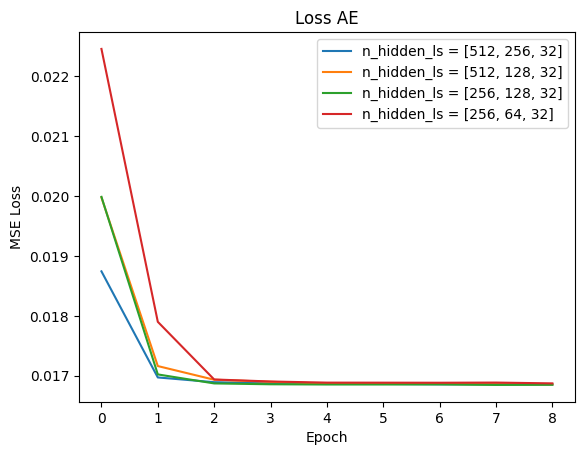

In [11]:
plt.figure()
for i in range(len(all_n_hidden_layers)):
    plt.plot(all_vali_losses[i], label='n_hidden_ls = ' + str(all_n_hidden_layers[i]))
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss AE')